## Voting Perceptrons

In [1]:
%matplotlib inline
import numpy as np
from numpy import zeros, ones, shape, dot, multiply
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X = []
y = []
with open("data1.txt") as f:
    for line in f:
        l = line.split();
        X.append([1, int(l[0]), int(l[1])])
        y.append(int(l[2]))
X = np.array(X)
y = np.array(y)

### Visualizing input

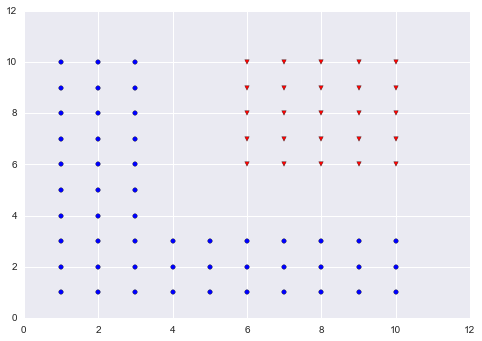

In [37]:
def displayData(X,y):
    plt.scatter(X[y==1,1],X[y==1,2])
    plt.scatter(X[y!=1,1],X[y!=1,2], marker='v', c='red')
displayData(X,y)

#### Defining Perceptron Algorithm

In [6]:
def findPerceptronWeights(X,Y,T):
    # initialize with zeros
    n = shape(X)[0]
    w = np.zeros_like(X[1])
    data = zip(X,Y)
    for i in range(T):
        np.random.shuffle(data)
        for x,y in data:
            if (dot(x,w)*y <= 0):
                w += y*x
    return w

#### Helper function to draw line

In [7]:
def drawLine2P(x,y,xlims):
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    plt.plot(xrange, k*xrange + b, 'k', color="black")

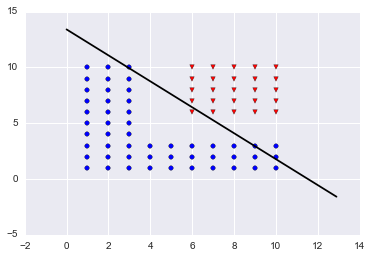

In [35]:
w = findPerceptronWeights(X,y,1000)
x1 = -w[0]/float(w[1]) # x intercept as determined from weights
x2 = -w[0]/float(w[2]) # y intercept as determined from weights
displayData(X,y)
drawLine2P([x1,0], [0,x2], [0,13])

### Defining Voting Perceptron

In [4]:
def votingPerceptron(X,Y,T):
    #shuffle data
    data = zip(X,Y)
    c = [0]
    w = np.zeros((1,shape(X)[1]))
    for i in range(T):
        np.random.shuffle(data)
        for x,y in data:
            if (dot(x,w[-1])*y <= 0):
                w = np.vstack((w, w[-1] + y*x))
                c.append(1)
            else:
                c[-1] += 1
    return w,c

In [5]:
w,c = votingPerceptron(X,y,10)

#### Predictions

In [6]:
def predict(X,w,c):
    # predict based on w and c values
    product_sign = np.sign(dot(X,w.T))
    weighted_sign = multiply(product_sign,c)
    predictions = np.sign(np.sum(weighted_sign, axis=1))
    return predictions

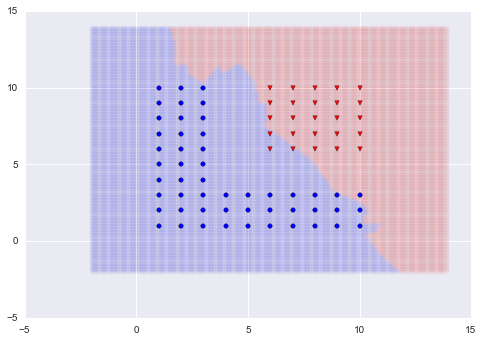

In [7]:
# Generating new data
X_new = np.array([[1,i*0.1,j*0.1] for j in range(-20,140) for i in range(-20,140)])
y_new = predict(X_new,w,c)
plt.scatter(X_new[y_new==1,1],X_new[y_new==1,2], c='b',alpha=.04)
plt.scatter(X_new[y_new!=1,1],X_new[y_new!=1,2], c='r',alpha=.04)
displayData(X,y)

### Defining Downsampled Voting Perceptron

In [8]:
from collections import deque

In [9]:
def downsampledPerceptron(X,Y,T, L):
    #shuffle data
    data = zip(X,Y)
    w = deque(np.zeros((1,shape(X)[1])),L)
    c = deque([0],L)
    for i in range(T):
        np.random.shuffle(data)
        for x,y in data:
            if (dot(x,w[-1])*y <= 0):
                w.append(w[-1] + y*x)
                c.append(1)
            else:
                c[-1] += 1
    return np.array(w),np.array(c)

In [24]:
w,c = downsampledPerceptron(X,y,100,20)

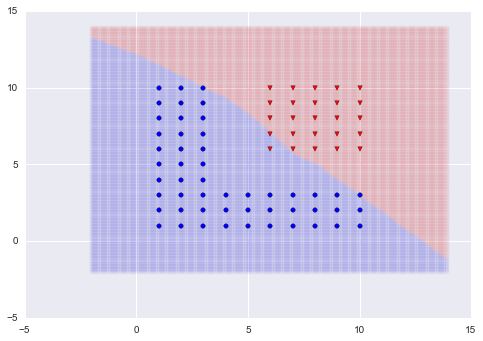

In [25]:
# Generating new data
X_new = np.array([[1,i*0.1,j*0.1] for j in range(-20,140) for i in range(-20,140)])
y_new = predict(X_new,w,c)
plt.scatter(X_new[y_new==1,1],X_new[y_new==1,2], c='b',alpha=.04)
plt.scatter(X_new[y_new!=1,1],X_new[y_new!=1,2], c='r',alpha=.04)
displayData(X,y)

### Averaged Perceptron

In [28]:
def averagedPerceptron(X,Y,T):
    #shuffle data
    data = zip(X,Y)
    w_sum = np.zeros(shape(X)[1])
    w_cur = np.zeros(shape(X)[1])
    for i in range(T):
        np.random.shuffle(data)
        for x,y in data:
            if (dot(x,w_cur)*y <= 0):
                w_cur += y*x
            w_sum += w_cur
    return w_sum

In [45]:
w = averagedPerceptron(X,y,10)

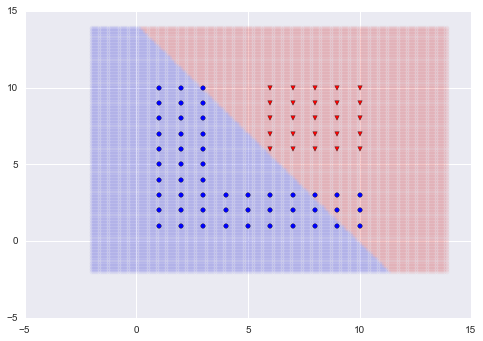

In [46]:
# Generating new data
X_new = np.array([[1,i*0.1,j*0.1] for j in range(-20,140) for i in range(-20,140)])
y_new = np.sign(dot(X_new,w))
plt.scatter(X_new[y_new==1,1],X_new[y_new==1,2], c='b',alpha=.04)
plt.scatter(X_new[y_new!=1,1],X_new[y_new!=1,2], c='r',alpha=.04)
displayData(X,y)